No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


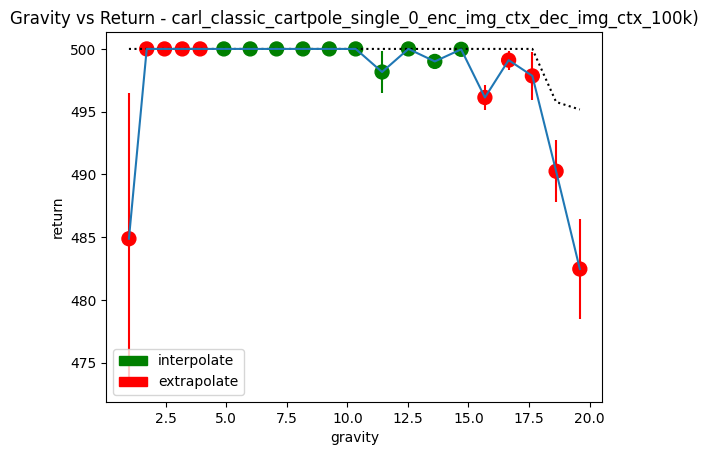

In [7]:
import json
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import argparse
from scipy.stats import sem
from pathlib import Path

logdir = Path("../logs") 


for exp_path in logdir.iterdir():
    experiment = exp_path.name
    if experiment != "carl_classic_cartpole_single_0_enc_img_ctx_dec_img_ctx_100k":
        continue

    gravity_to_seed_to_return = {}
    gravity_to_context = {}
    for seed_path in exp_path.iterdir():
        seed = int(seed_path.name)
        with (seed_path / "eval.jsonl").open() as f:
            lines = f.readlines()
        lines = [json.loads(line) for line in lines if not json.loads(line)['aggregated_context_metric"]]
        for line in lines:
            gravity = line['context'].get('gravity', 9.8)
            if gravity not in gravity_to_seed_to_return:
                gravity_to_seed_to_return[gravity] = {}
            gravity_to_seed_to_return[gravity][seed] = float(line['return'])
            gravity_to_context[gravity] = line['context_distribution']


    # Plotting
    x = []
    y = []
    y_max = []
    yerr = []
    colors = []
    for gravity in gravity_to_seed_to_return:
        x.append(gravity)
        y.append(np.mean([gravity_to_seed_to_return[gravity][seed] for seed in gravity_to_seed_to_return[gravity]]))
        y_max.append(np.max([gravity_to_seed_to_return[gravity][seed] for seed in gravity_to_seed_to_return[gravity]]))
        yerr.append(np.std([gravity_to_seed_to_return[gravity][seed] for seed in gravity_to_seed_to_return[gravity]]) / np.sqrt(len(gravity_to_seed_to_return[gravity])))
        if gravity in gravity_to_context and gravity_to_context[gravity] == "interpolate":
            colors.append('green')
        else:
            colors.append('red')
            
    # sort x, y, yerr, colors by x
    x, y, yerr, colors = zip(*sorted(zip(x, y, yerr, colors)))
    plt.errorbar(x, y, yerr=yerr, ecolor=colors)
    plt.scatter(x, y, color=colors, marker='o', s=100)
    # plot max as a dotted line
    plt.plot(x, y_max, linestyle='dotted', color='black')

    # Add legend and labels
    plt.legend()
    plt.xlabel('gravity')
    plt.ylabel('return')
    plt.title(f'Gravity vs Return - {experiment})')

    # legend with green as "interpolate" and red as "extrapolate"
    import matplotlib.patches as mpatches
    green_patch = mpatches.Patch(color='green', label='interpolate')
    red_patch = mpatches.Patch(color='red', label='extrapolate')
    plt.legend(handles=[green_patch, red_patch])

    # Show the plot
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


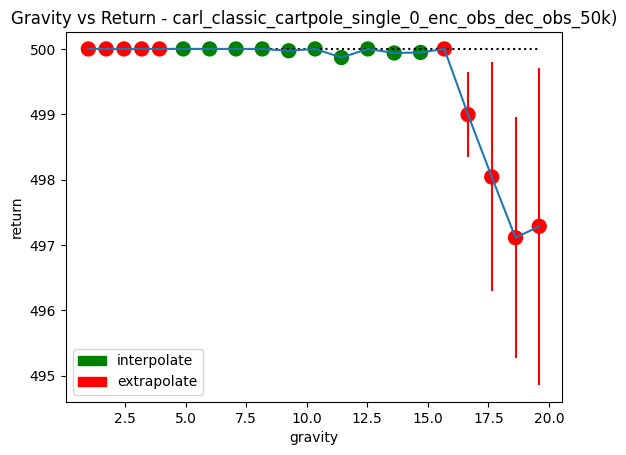

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


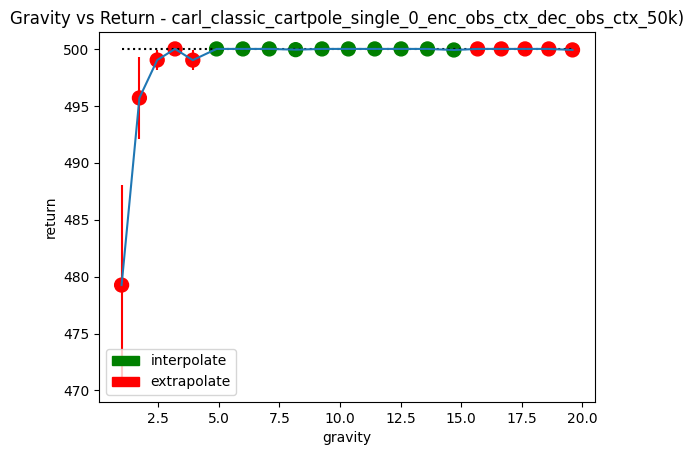

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


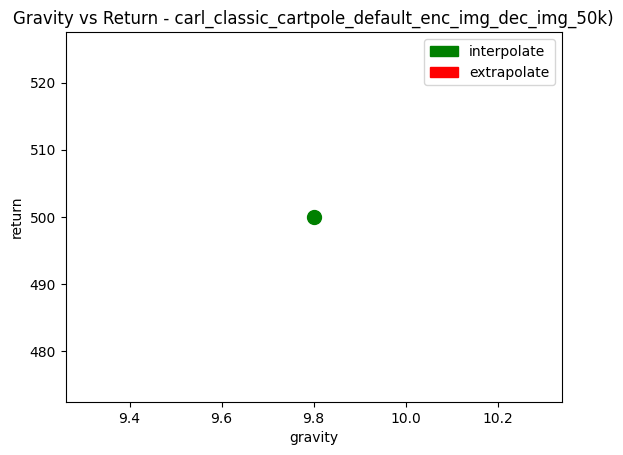

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


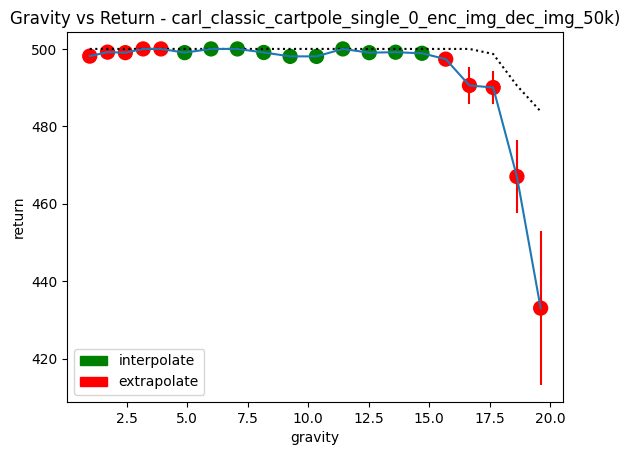

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


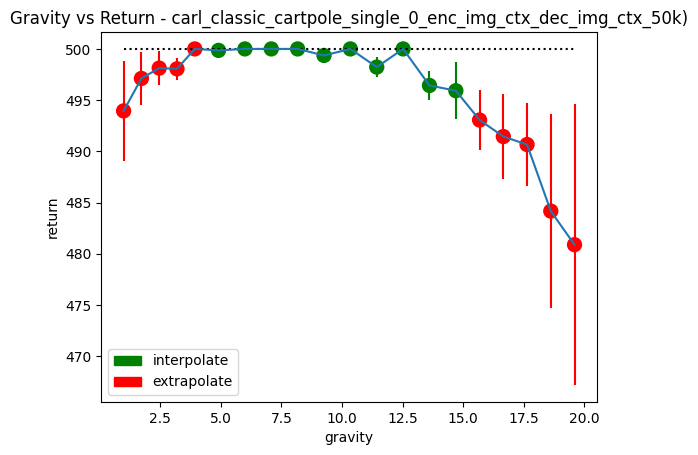

In [8]:
import json
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import argparse
from scipy.stats import sem
from pathlib import Path

logdir = Path("../logs") 


for exp_path in logdir.iterdir():
    experiment = exp_path.name
    if experiment not in ["carl_classic_cartpole_single_0_enc_img_dec_img_50k", "carl_classic_cartpole_single_0_enc_img_ctx_dec_img_ctx_50k", "carl_classic_cartpole_single_0_enc_obs_dec_obs_50k", "carl_classic_cartpole_single_0_enc_obs_ctx_dec_obs_ctx_50k"]:
        continue

    gravity_to_seed_to_return = {}
    gravity_to_context = {}
    for seed_path in exp_path.iterdir():
        seed = int(seed_path.name)
        with (seed_path / "eval.jsonl").open() as f:
            lines = f.readlines()
        lines = [json.loads(line) for line in lines if not json.loads(line)['aggregated_context_metric']]
        for line in lines:
            gravity = line['context'].get('gravity', 9.8)
            if gravity not in gravity_to_seed_to_return:
                gravity_to_seed_to_return[gravity] = {}
            gravity_to_seed_to_return[gravity][seed] = float(line['return'])
            gravity_to_context[gravity] = line['context_distribution']


    # Plotting
    x = []
    y = []
    y_max = []
    yerr = []
    colors = []
    for gravity in gravity_to_seed_to_return:
        x.append(gravity)
        y.append(np.mean([gravity_to_seed_to_return[gravity][seed] for seed in gravity_to_seed_to_return[gravity]]))
        y_max.append(np.max([gravity_to_seed_to_return[gravity][seed] for seed in gravity_to_seed_to_return[gravity]]))
        yerr.append(np.std([gravity_to_seed_to_return[gravity][seed] for seed in gravity_to_seed_to_return[gravity]]) / np.sqrt(len(gravity_to_seed_to_return[gravity])))
        if gravity in gravity_to_context and gravity_to_context[gravity] == "interpolate":
            colors.append('green')
        else:
            colors.append('red')
            
    # sort x, y, yerr, colors by x
    x, y, yerr, colors = zip(*sorted(zip(x, y, yerr, colors)))
    plt.errorbar(x, y, yerr=yerr, ecolor=colors)
    plt.scatter(x, y, color=colors, marker='o', s=100)
    # plot max as a dotted line
    plt.plot(x, y_max, linestyle='dotted', color='black')

    # Add legend and labels
    plt.legend()
    plt.xlabel('gravity')
    plt.ylabel('return')
    plt.title(f'Gravity vs Return - {experiment})')

    # legend with green as "interpolate" and red as "extrapolate"
    import matplotlib.patches as mpatches
    green_patch = mpatches.Patch(color='green', label='interpolate')
    red_patch = mpatches.Patch(color='red', label='extrapolate')
    plt.legend(handles=[green_patch, red_patch])

    # Show the plot
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


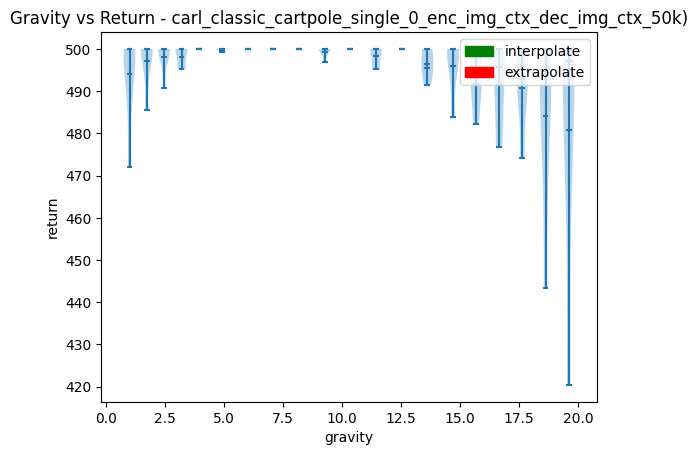

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


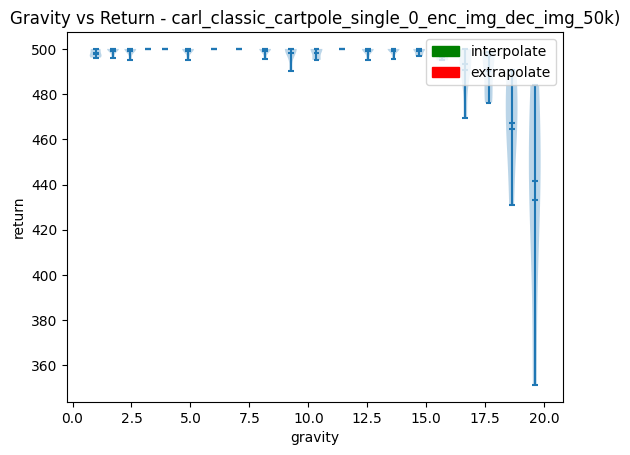

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


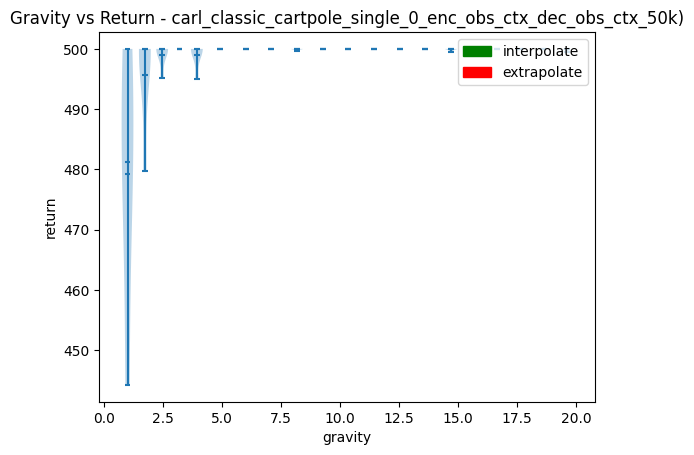

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


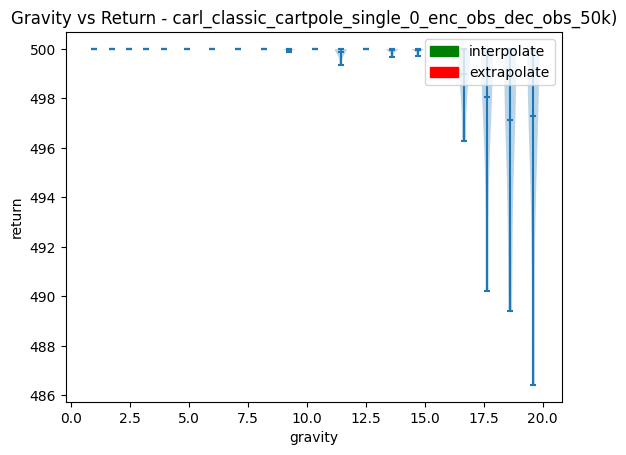

In [1]:
import json
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import argparse
from scipy.stats import sem
from pathlib import Path

logdir = Path("../logs") 


for exp_path in logdir.iterdir():
    experiment = exp_path.name
    if experiment not in ["carl_classic_cartpole_single_0_enc_img_dec_img_50k", "carl_classic_cartpole_single_0_enc_img_ctx_dec_img_ctx_50k", "carl_classic_cartpole_single_0_enc_obs_dec_obs_50k", "carl_classic_cartpole_single_0_enc_obs_ctx_dec_obs_ctx_50k"]:
        continue

    gravity_to_seed_to_return = {}
    gravity_to_context = {}
    for seed_path in exp_path.iterdir():
        seed = int(seed_path.name)
        with (seed_path / "eval.jsonl").open() as f:
            lines = f.readlines()
        lines = [json.loads(line) for line in lines if not json.loads(line)['aggregated_context_metric']]
        for line in lines:
            gravity = line['context'].get('gravity', 9.8)
            if gravity not in gravity_to_seed_to_return:
                gravity_to_seed_to_return[gravity] = {}
            gravity_to_seed_to_return[gravity][seed] = float(line['return'])
            gravity_to_context[gravity] = line['context_distribution']


    # Plotting
    x = []
    y = []
    colors = []
    for gravity in gravity_to_seed_to_return:
        x.append(gravity)
        y.append(np.array([gravity_to_seed_to_return[gravity][seed] for seed in gravity_to_seed_to_return[gravity]]))
        if gravity in gravity_to_context and gravity_to_context[gravity] == "interpolate":
            colors.append('green')
        else:
            colors.append('red')
            
    # sort x, y, yerr, colors by x
    x, y, colors = zip(*sorted(zip(x, y, colors)))
    plt.violinplot(y, x, showmeans=True, showextrema=True, showmedians=True)

    # Add legend and labels
    plt.xlabel('gravity')
    plt.ylabel('return')
    plt.title(f'Gravity vs Return - {experiment})')

    # legend with green as "interpolate" and red as "extrapolate"
    import matplotlib.patches as mpatches
    green_patch = mpatches.Patch(color='green', label='interpolate')
    red_patch = mpatches.Patch(color='red', label='extrapolate')
    plt.legend(handles=[green_patch, red_patch])

    # Show the plot
    plt.show()


In [3]:
import json
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import argparse
from scipy.stats import sem
from pathlib import Path
from contextual_mbrl.dreamer.envs import _TASK2CONTEXTS
logdir = Path("../logs") 

t_step = "50k"
tasks = ["classic_cartpole"]
train_settings = ["default", "single"] # default context, varying single context in a interpolation range 
contexts = [0, 1]
modalities = ["obs", "img"]

task = tasks[0]
train_setting = train_settings[0]
context_idx = contexts[0]
modality = modalities[0]

train_setting_full = "default" if train_setting == "default" else f"{train_setting}_{context_idx}"

experiments = [
    logdir / f"carl_{task}_{train_setting_full}_enc_{modality}_dec_{modality}_{t_step}", 
    logdir / f"carl_{task}_{train_setting_full}_enc_{modality}_ctx_dec_{modality}_ctx_{t_step}"
] 


context_name = _TASK2CONTEXTS[task][context_idx]["context"]
data = {
    "context_val": [],
    "input": [],
    "return": [],
    "dist": []
}



for exp_path in experiments:
    experiment = exp_path.name
    inp = "with_ctx" if "ctx" in experiment else "without_ctx"
    for seed_path in exp_path.iterdir():
        seed = int(seed_path.name)
        eval_file = seed_path / "eval.jsonl"
        if not eval_file.exists():
            continue
        with eval_file.open() as f:
            lines = f.readlines()
        lines = [json.loads(line) for line in lines if not json.loads(line)['aggregated_context_metric']]
        for line in lines:
            if context_name in line["ctx"]["changed"] or len(line["ctx"]["changed"]) == 0:
                ctx_value = line['ctx']["context"][context_name]
                ret = float(line['return'])
                dist = line['ctx']["dist"]
                data["context_val"].append(ctx_value)
                data["input"].append(inp)
                data["return"].append(ret)
                data["dist"].append(dist)


In [2]:
import pandas as pd
df = pd.DataFrame.from_dict(data)

interpolate_vals = df[df["dist"] == "interpolate"]["context_val"]
interpolate_range = interpolate_vals.min(), interpolate_vals.max()
if interpolate_range[0] == interpolate_range[1]:
    interpolate_range = interpolate_range[0] - 0.1, interpolate_range[1] + 0.1

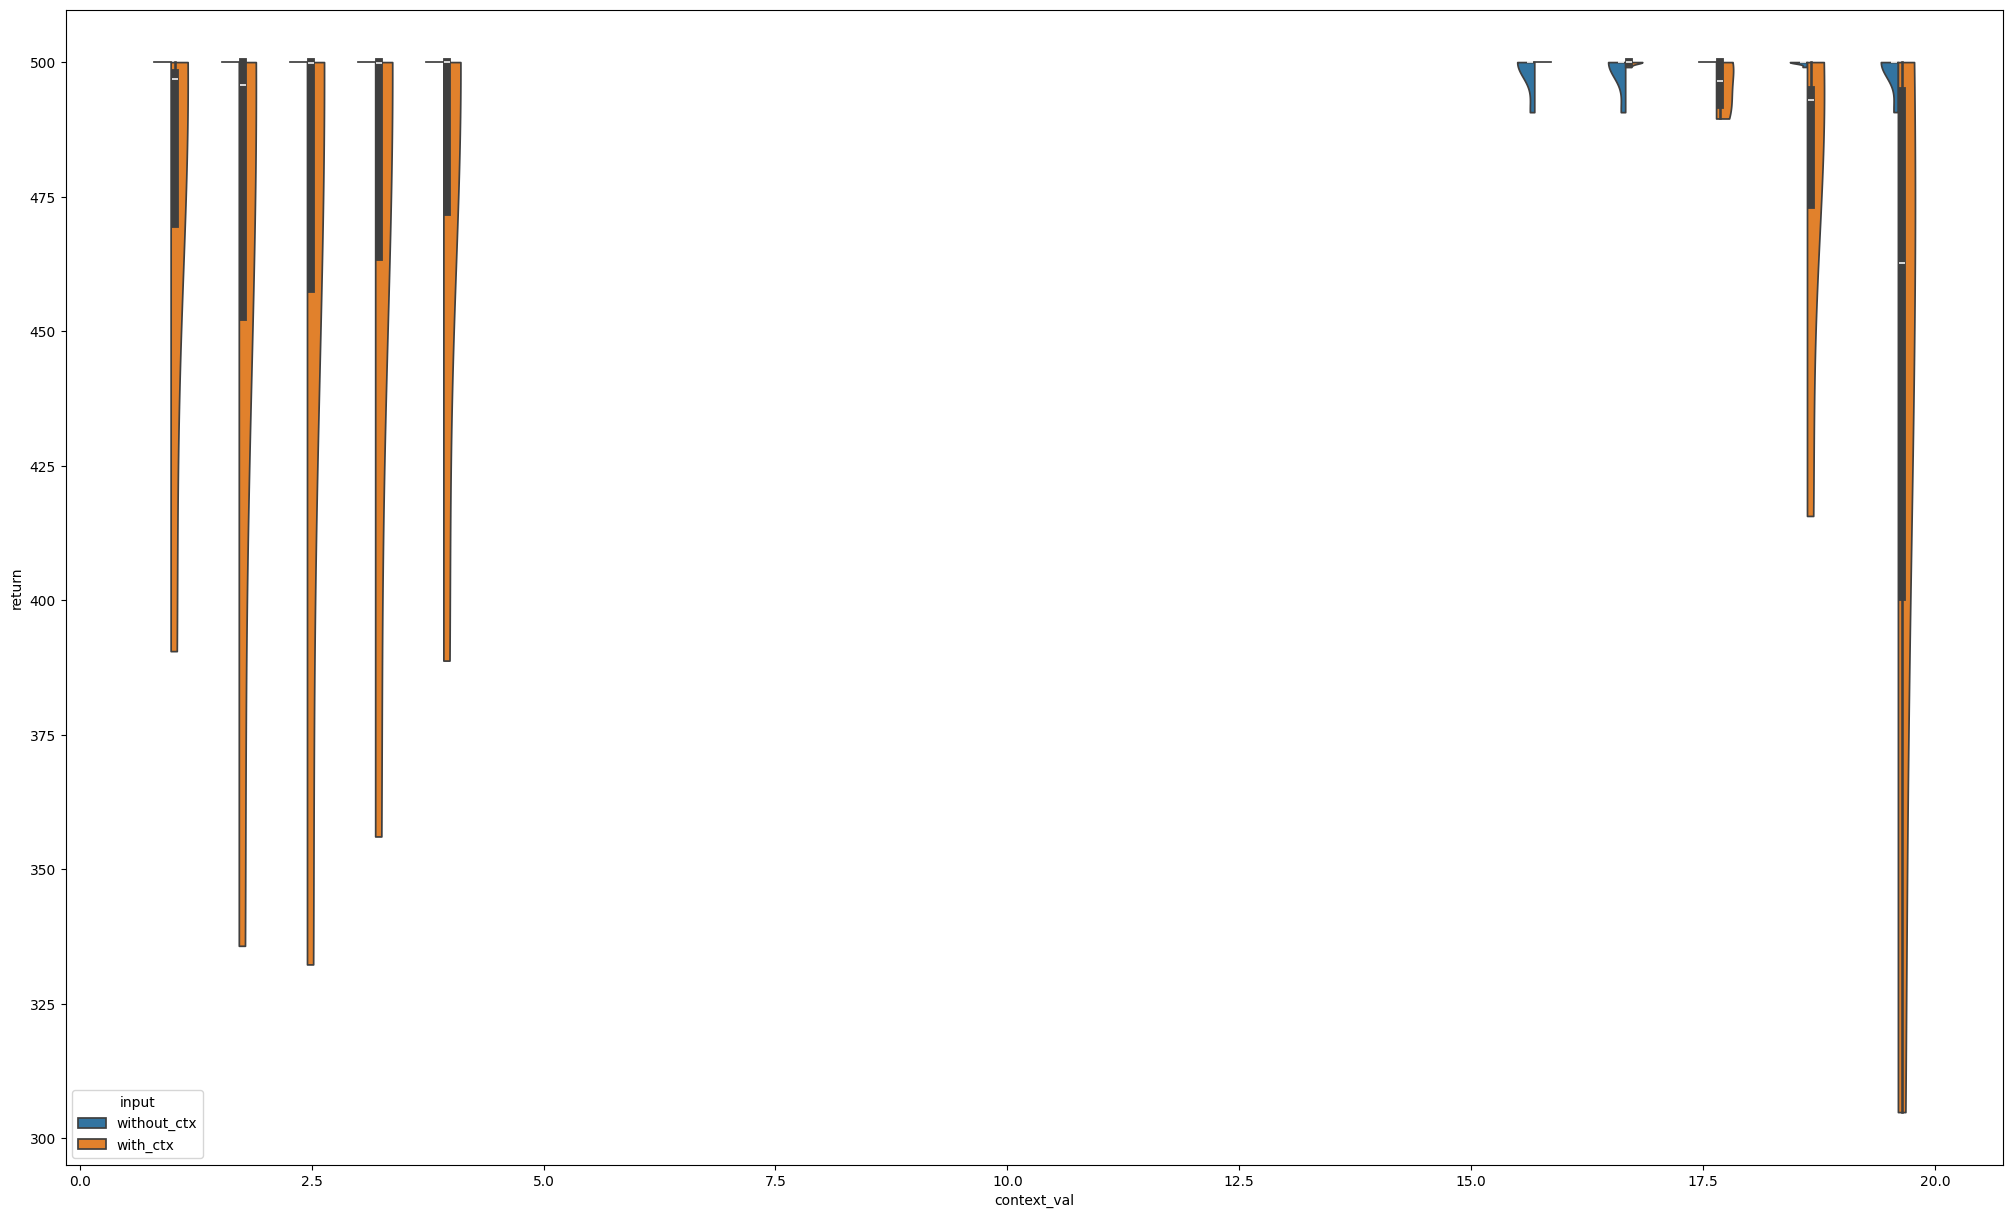

In [4]:
import seaborn as sns
plt.figure(figsize=(25,15))
sns.violinplot(data=df, x="context_val", y="return", hue="input", split=True, cut=0, native_scale=True, density_norm="width", width=0.5)
# in the interpolate range, set the background color to green
plt.axvspan(interpolate_range[0], interpolate_range[1], facecolor='g', alpha=0.1)


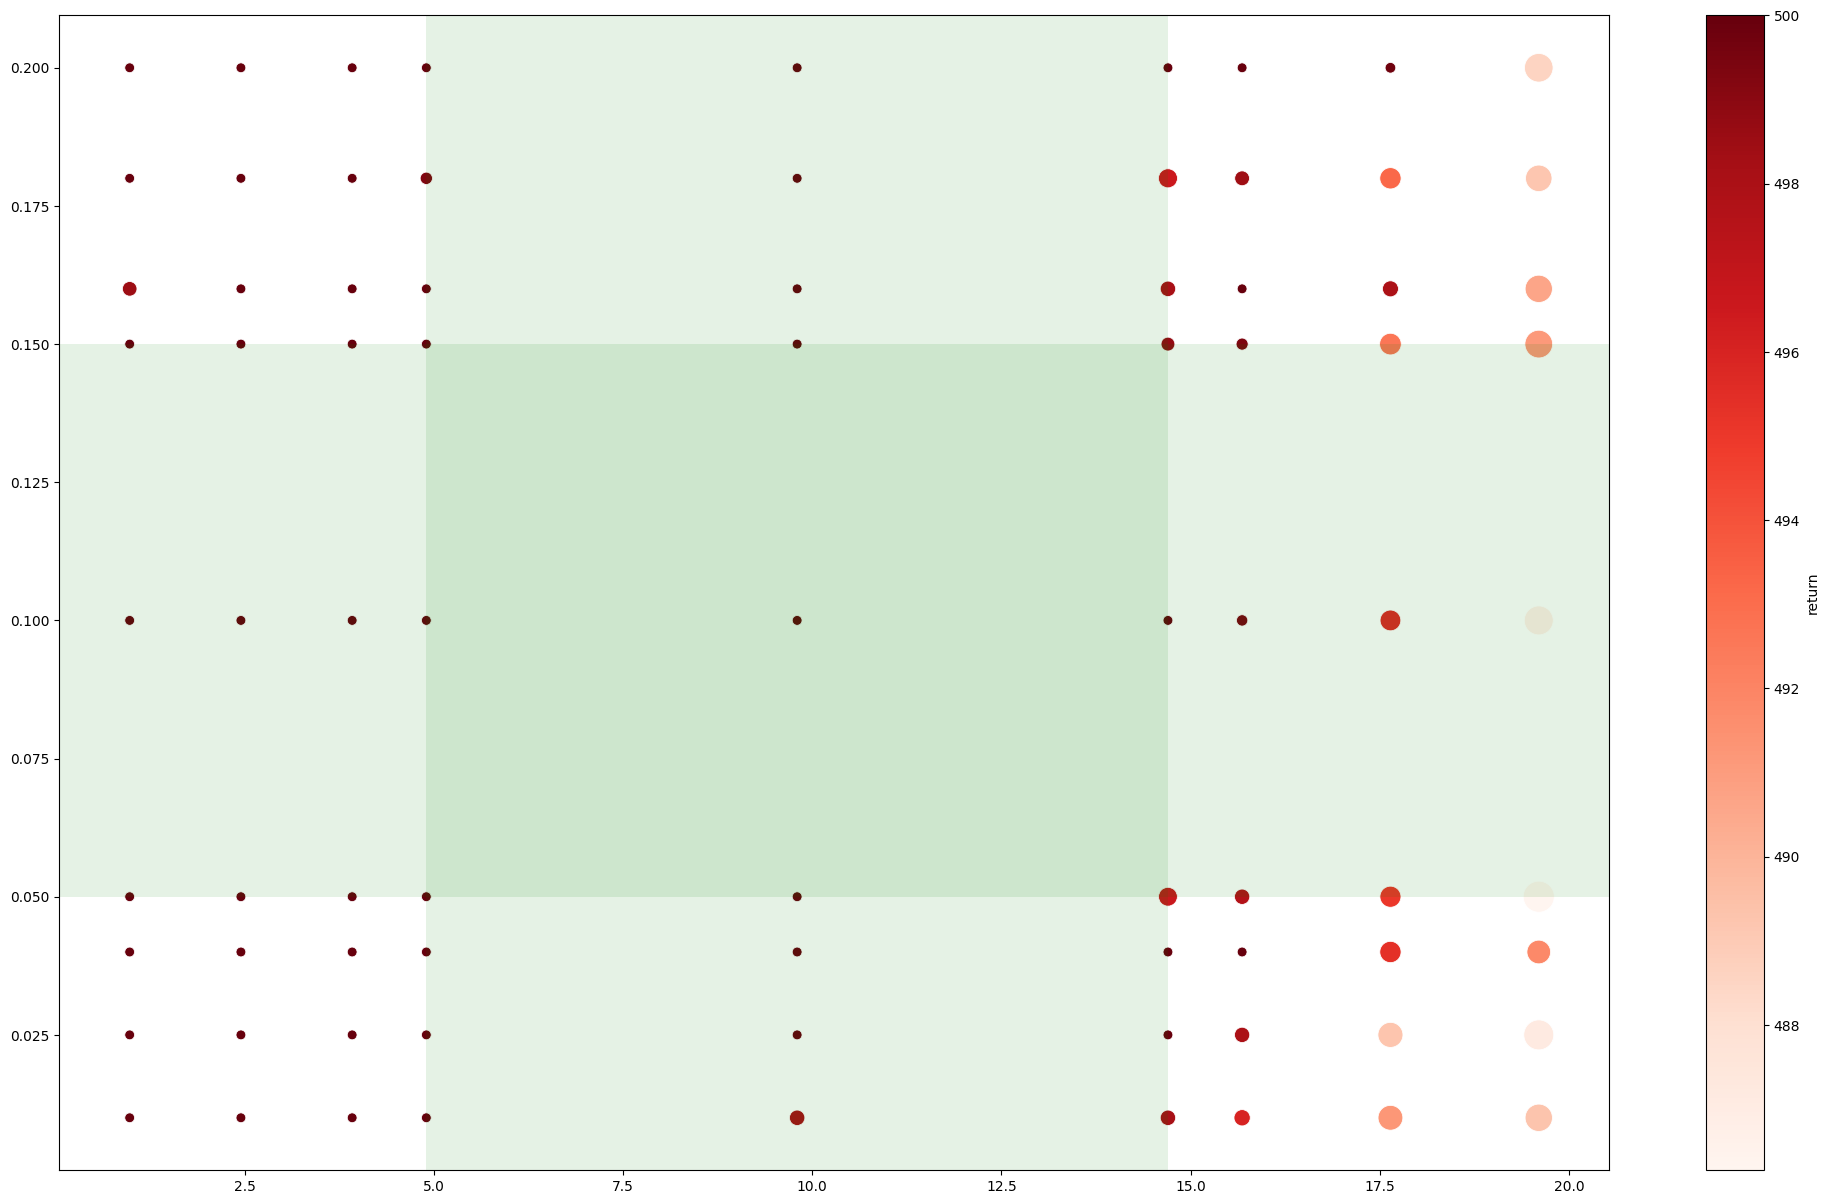

In [25]:
import json
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import argparse
from scipy.stats import sem
from pathlib import Path
from contextual_mbrl.dreamer.envs import _TASK2CONTEXTS, _TASK2ENV
from collections import defaultdict
logdir = Path("../logs") 

t_step = "50k"
tasks = ["classic_cartpole"]
modalities = ["obs", "img"]

task = tasks[0]
modality = modalities[0]

exp_path = logdir / f"carl_{task}_double_box_enc_{modality}_dec_{modality}_{t_step}"

data = defaultdict(list)


ctx_0 = _TASK2CONTEXTS[task][0]["context"]
ctx_1 = _TASK2CONTEXTS[task][1]["context"]

env = _TASK2ENV[task]
ctx_0_default = env.get_default_context()[ctx_0]
ctx_1_default = env.get_default_context()[ctx_1]
interpolation_range_0_pct = _TASK2CONTEXTS[task][0]["interpolate"][0]
interpolation_range_1_pct = _TASK2CONTEXTS[task][1]["interpolate"][0]
interpolate_range_0 = ctx_0_default * interpolation_range_0_pct[0], ctx_0_default * interpolation_range_0_pct[1]
interpolate_range_1 = ctx_1_default * interpolation_range_1_pct[0], ctx_1_default * interpolation_range_1_pct[1]

experiment = exp_path.name
inp = "with_ctx" if "ctx" in experiment else "without_ctx"
for seed_path in exp_path.iterdir():
    seed = int(seed_path.name)
    eval_file = seed_path / "eval.jsonl"
    if not eval_file.exists():
        continue
    with eval_file.open() as f:
        lines = f.readlines()
    lines = [json.loads(line) for line in lines if not json.loads(line)['aggregated_context_metric']]
    for line in lines:
        
        ctx_0_value = line['ctx']["context"][ctx_0]
        ctx_1_value = line['ctx']["context"][ctx_1]
        ret = float(line['return'])
        data[(ctx_0_value, ctx_1_value)].append(ret)

# plot 2d ctx1 and ctx2, with the return value as color and std as size
x = []
y = []
c = []
s = []
for ctx_0_value, ctx_1_value in data:
    x.append(ctx_0_value)
    y.append(ctx_1_value)
    c.append(np.mean(data[(ctx_0_value, ctx_1_value)]))
    s.append(np.std(data[(ctx_0_value, ctx_1_value)]))

# plot with seaborn

import seaborn as sns
plt.figure(figsize=(25,15))

# 3d scatter plot with return value as height and std as size, use a white to red color map

sns.scatterplot(x=x, y=y, hue=c, size=s, sizes=(50, 500), legend=False, palette="Reds")
# plot the legend
# set background to green in the interpolation range
plt.axhspan(interpolate_range_1[0], interpolate_range_1[1], facecolor='g', alpha=0.1)
plt.axvspan(interpolate_range_0[0], interpolate_range_0[1], facecolor='g', alpha=0.1)
# print the scale for the return color as colorbar
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=min(c), vmax=max(c))
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

plt.colorbar(sm, ax=plt.gca(), label="return")
